In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Input File (CSV) and initialize the yelp data
input_data_file = "resources/yelp_clean.csv"
df = pd.read_csv(input_data_file)
df.head()

,restaurant,address,recent_health_score,recent_health_risk,average_health_score,zipcode,yelp_business_id,rating,price,review_count,category_1,category_2,category_3,distance,cuisine
0,CHARLIE'S DELI CAFE,3202 FOLSOM St,88.0,Low Risk,86.315789,94117,hNze7c3mWvEnAXYT_geV9Q,4.5,$,82,Delis,Sandwiches,NaN,11.894793,Other
1,ART'S CAFE,747 IRVING St,94.0,Low Risk,90.500000,94122,MXKWFQHoC0SXy9UI-Djn7g,4.0,$,1071,Diners,Korean,American (Traditional),8.885345,Other
2,CAFE X + O,1799 Church St,92.0,Low Risk,91.750000,94131,HhAmBwTYq_MXbOLzypRQjQ,3.5,$,223,Coffee & Tea,Sandwiches,NaN,7.502404,Other
3,Oasis Grill,91 Drumm St,70.0,Low Risk,72.454545,94111,gBRjRvIfA4fIo6pNebTjuA,4.0,$$,1200,Mediterranean,Desserts,Salad,5.072415,Mediterranean
4,Chowders,Pier 39 Space A3,98.0,Low Risk,94.500000,94133,oic-xcRpi-yXG3KZ4go0mg,3.5,$$,770,Seafood,Fish & Chips,Soup,57.334700,Other


In [22]:
# organize data for ANOVA testing
american = df.loc[(df["cuisine"] == "American")]
chinese = df.loc[(df["cuisine"] == "Chinese")]
indian = df.loc[(df["cuisine"] == "Indian")]
italian = df.loc[(df["cuisine"] == "Italian")]
japanese = df.loc[(df["cuisine"] == "Japanese")]
korean = df.loc[(df["cuisine"] == "Korean")]
mediterranean = df.loc[(df["cuisine"] == "Mediterranean")]
mexican = df.loc[(df["cuisine"] == "Mexican")]
other = df.loc[(df["cuisine"] == "Other")]
thai = df.loc[(df["cuisine"] == "Thai")]
vietnamese = df.loc[(df["cuisine"] == "Vietnamese")]


In [23]:
# How do we know if any of the cuisines are statistically different?
# Perform the ANOVA
stats.f_oneway(american["average_health_score"], chinese["average_health_score"], indian["average_health_score"], 
           italian["average_health_score"], japanese["average_health_score"], korean["average_health_score"],
           mediterranean["average_health_score"], mexican["average_health_score"],
           thai["average_health_score"], vietnamese["average_health_score"])

F_onewayResult(statistic=27.20692704882155, pvalue=1.6276800732195356e-43)

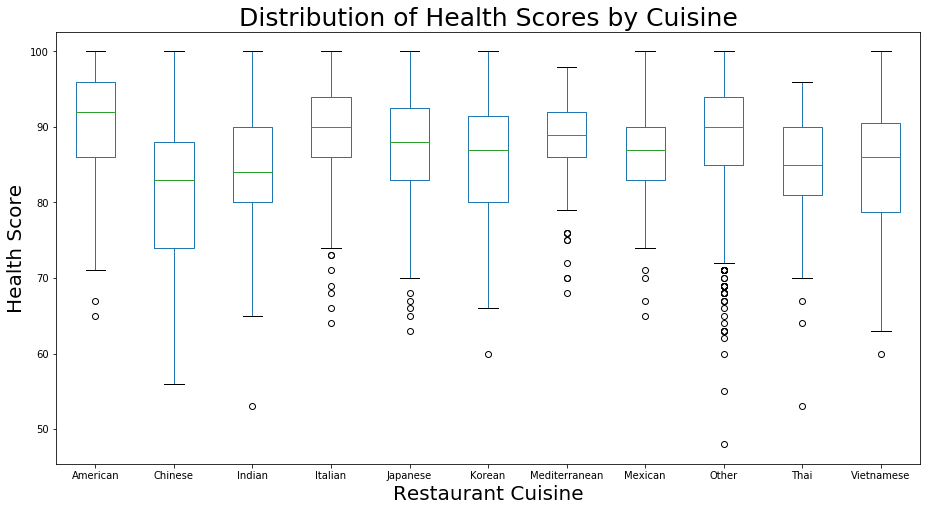

In [24]:
cuisine = df.boxplot("recent_health_score", by="cuisine", figsize=(15, 8), grid=False)
cuisine.set_xlabel("Restaurant Cuisine", fontsize=20)
cuisine.set_ylabel("Health Score", fontsize=20)
cuisine.set_title("Distribution of Health Scores by Cuisine", fontsize=25)
plt.suptitle("")
plt.savefig("figures/cuisine_boxplot.png")

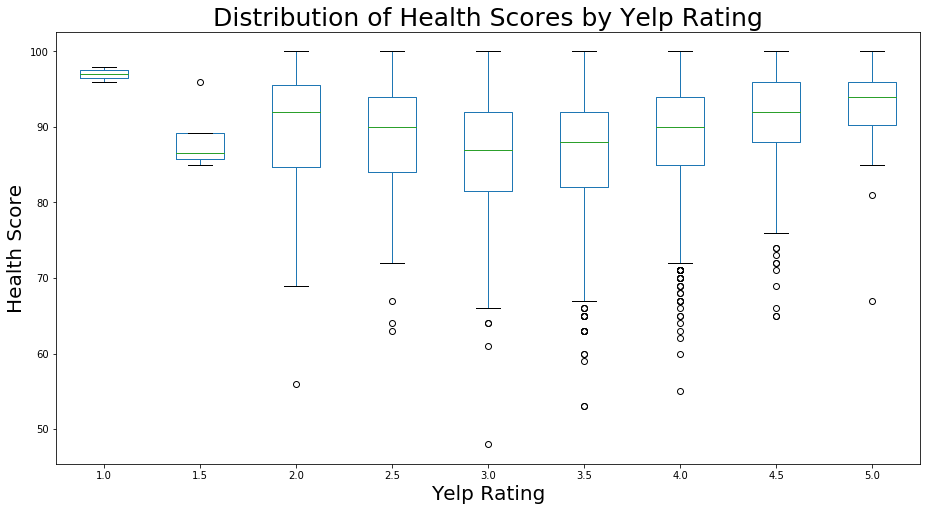

In [25]:
rating = df.boxplot("recent_health_score", by="rating", figsize=(15, 8), grid=False)
rating.set_xlabel("Yelp Rating", fontsize=20)
rating.set_ylabel("Health Score", fontsize=20)
rating.set_title("Distribution of Health Scores by Yelp Rating", fontsize=25)
plt.suptitle("")
plt.savefig("figures/rating_boxplot.png")

In [26]:
# organize  ratings data for ANOVA testing
rating_1 = df.loc[(df["rating"] == 1)]
rating_1_5 = df.loc[(df["rating"] == 1.5)]
rating_2 = df.loc[(df["rating"] == 2)]
rating_2_5 = df.loc[(df["rating"] == 2.5)]
rating_3 = df.loc[(df["rating"] == 3)]
rating_3_5 = df.loc[(df["rating"] == 3.5)]
rating_4 = df.loc[(df["rating"] == 4)]
rating_4_5 = df.loc[(df["rating"] == 4.5)]
rating_5 = df.loc[(df["rating"] == 5)]


In [27]:
# How do we know if any of the cuisines are statistically different?
# Perform the ANOVA
stats.f_oneway(rating_2["average_health_score"],
           rating_2_5["average_health_score"],rating_3["average_health_score"],rating_3_5["average_health_score"],
           rating_4["average_health_score"],rating_4_5["average_health_score"],rating_5["average_health_score"])

F_onewayResult(statistic=28.757253841315418, pvalue=1.4454455965981587e-33)

array(['Other', 'Mediterranean', 'Italian', 'Japanese', 'Korean',
       'Mexican', 'Chinese', 'Indian', 'Thai', 'American', 'Vietnamese'],
      dtype=object)